
Assignment 5 - 09/26/2019
Name: Carolina Carvalho Manhaes Leite
NetID: leite2

------------

The original dataset has 8635 rows and 32 columns.

------------

Descriptive Statistics of Target Variable (Adj_Close)

count    8071.000000
mean        5.509793
std         2.491110
min         2.801050
25%         3.130587
50%         4.956219
75%         8.051437
max        10.150118
Name: Adj_Close, dtype: float64
 
------------

The dataset without the target missing values has 8071 rows and 32 columns.
The dataset without the first column has 8071 rows and 31 columns.

------------

The features array has 8071 rows and 30 columns.
The target array has 8071 rows.

------------

Heat Map of Features + Target Correlation Matrix



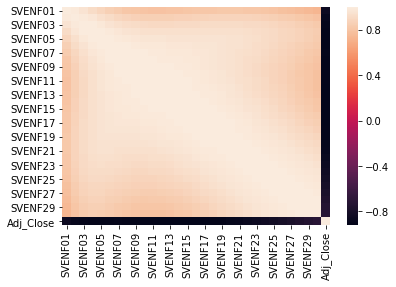


Correlations with the target variable

           Adj_Close
SVENF01    -0.849562
SVENF02    -0.884194
SVENF03    -0.898952
SVENF04    -0.903707
SVENF05    -0.903779
SVENF06    -0.902343
SVENF07    -0.901242
SVENF08    -0.901317
SVENF09    -0.902706
SVENF10    -0.905134
SVENF11    -0.908136
SVENF12    -0.911199
SVENF13    -0.913843
SVENF14    -0.915651
SVENF15    -0.916273
SVENF16    -0.915428
SVENF17    -0.912890
SVENF18    -0.908483
SVENF19    -0.902080
SVENF20    -0.893599
SVENF21    -0.883003
SVENF22    -0.870305
SVENF23    -0.855566
SVENF24    -0.838894
SVENF25    -0.820440
SVENF26    -0.800395
SVENF27    -0.778980
SVENF28    -0.756435
SVENF29    -0.733014
SVENF30    -0.708970
Adj_Close   1.000000

------------



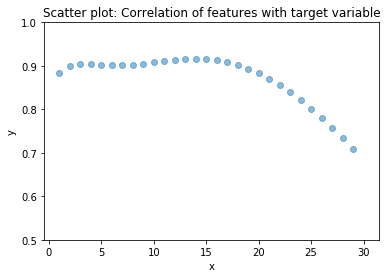

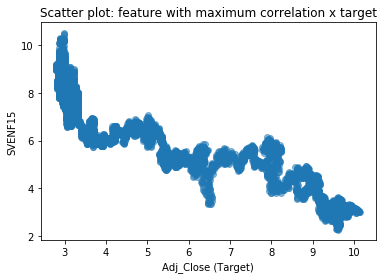

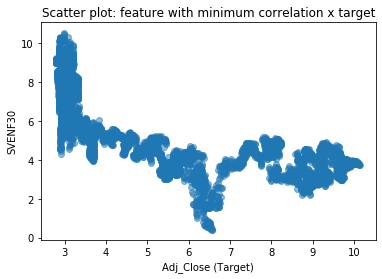


------------

The explained variance for each of the components/features is (in order):

[9.31796975e-01 4.07650756e-02 2.18438668e-02 4.85133058e-03
 6.63341250e-04 6.87379176e-05 9.48168675e-06 1.09876995e-06
 8.50910960e-08 6.74428451e-09 4.72621857e-10 3.80161775e-11
 9.30609065e-12 8.71811396e-12 8.59362280e-12 8.53519254e-12
 8.41818231e-12 8.32407041e-12 8.16475927e-12 8.12446450e-12
 7.94366171e-12 7.84486451e-12 7.70300119e-12 7.56475430e-12
 7.49445649e-12 7.39336209e-12 7.21415235e-12 6.93802195e-12
 6.58019099e-12 6.26023985e-12]

Graphically:



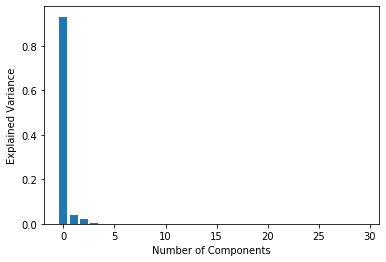

 
The cumulative explained variance is (in order):

[0.93179697 0.97256205 0.99440592 0.99925725 0.99992059 0.99998933
 0.99999881 0.99999991 0.99999999 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]

Graphically:



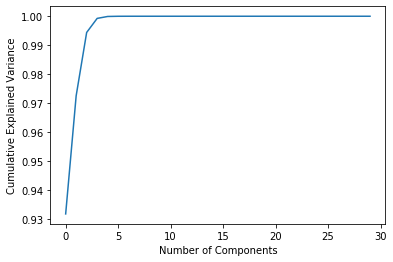


------------

The cumulative explained variance for those 3 components is (in order):

[0.93179697 0.97256205 0.99440592]

It means that, together, they explain 0.994 of all variance.

------------

1st Model: LINEAR REGRESSION with all attributes
Metrics:

MSE train: 0.115
MSE test: 0.120
R2 train: 0.885
R2 test: 0.880

The processing time was: 0.044

------------

2nd Model: LINEAR REGRESSION with 3 principal components
Metrics:

MSE train: 0.142
MSE test: 0.146
R2 train: 0.858
R2 test: 0.854

The processing time was: 0.029

------------

3rd Model: SVR with all attributes
Metrics:

MSE train: 0.106
MSE test: 0.107
R2 train: 0.894
R2 test: 0.893

The processing time was: 25.638

------------

4th Model: SVR with 3 principal components
Metrics:

MSE train: 0.137
MSE test: 0.140
R2 train: 0.863
R2 test: 0.860

The processing time was: 21.454

------------

My name is Carolina Carvalho Manhaes Leite
My NetID is: leite2
I hereby certify that I have read the University policy on Academic

In [62]:
print ("\nAssignment 5 - 09/26/2019")
print("Name: Carolina Carvalho Manhaes Leite")
print("NetID: leite2")
print("\n------------\n")

# IMPORTING LIBRARIES #

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from time import process_time

# SETTINGS #

plt.clf()

# IMPORTING THE DATA #

# Import csv file
df = pd.read_csv('/Users/carolinacmleite/Documents/01 - Documents/04 - Academic/03 - Master/02 - Financial Engineering (UIUC)/01 - Fall 2019/IE598 - Machine Learning in Fin Lab/03 - Assignments/IE598_F19_HW5_Data_09292019.csv',header=0)
# Display its shape (#rows and #columns)
print('The original dataset has ' + str(df.shape[0]) + ' rows and ' + str(df.shape[1]) + ' columns.\n')
print("------------\n")

# DS of Target Variable
print ("Descriptive Statistics of Target Variable (Adj_Close)\n")
for x in range(-1,0):
    lastvar = df[df.columns[x]]
    print (lastvar.describe())
    print(" ")
    #plt.boxplot(lastvar)
    #plt.show()
    #plt.clf()
    #print("--\n")
print("------------\n")

# The count of the target is less than the total number of rows.
# It means we have some missing values in the target value. While we could choose an input method to infer these values but,
# to make it simple, I'll drop them.
df = df.dropna(subset=['Adj_Close'])
print('The dataset without the target missing values has ' + str(df.shape[0]) + ' rows and ' + str(df.shape[1]) + ' columns.')

# Drop the 1st column
df = df.iloc[:, 1:]
print('The dataset without the first column has ' + str(df.shape[0]) + ' rows and ' + str(df.shape[1]) + ' columns.')
print("\n------------\n")

# Drop the target (Adj_Close) from the features array
X = df.drop('Adj_Close', axis=1).values
print('The features array has ' + str(X.shape[0]) + ' rows and ' + str(X.shape[1]) + ' columns.')
# Extract the target (Adj_Close) and move it to its own array
y = df['Adj_Close'].values
y = y.reshape(-1, 1)
print('The target array has ' + str(y.shape[0]) + ' rows.')
print("\n------------\n")

# DESCRIPTIVE STATISTICS #

# DS of Feature Variables
#print ("Descriptive Statistics of Original Variables\n")
#for x in range(0, 30):
    #lastvar = df[df.columns[x]]
    #print (lastvar.describe())
    #print(" ")
    #plt.boxplot(lastvar)
    #plt.show()
    #plt.clf()
    #print("--\n")
#print("------------\n")

# CORRELATION MATRIX #    

# Compute Pearson correlation
corr = df.corr()
# Create heat map with correlations calculated above
print ("Heat Map of Features + Target Correlation Matrix\n")
sns.heatmap(corr)
plt.show()
plt.clf()
print ("\nCorrelations with the target variable\n")
print(np.transpose(corr[30:]))
print("\n------------\n")

X_axis_corr = np.arange(1, 31)
y_axis_corr = -1*np.transpose(corr[30:])
y_axis_corr = y_axis_corr[1:31]
axes = plt.gca()
axes.set_ylim([0.5,1])
plt.scatter(X_axis_corr, y_axis_corr, alpha=0.5)
plt.title('Scatter plot: Correlation of features with target variable')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
plt.clf()
print(" ")

X_max_corr = df['SVENF15'].values
X_min_corr = df['SVENF30'].values
plt.scatter(y, X_max_corr, alpha=0.5)
plt.title('Scatter plot: feature with maximum correlation x target')
plt.xlabel('Adj_Close (Target)')
plt.ylabel('SVENF15')
plt.show()
plt.clf()
print(" ")
plt.scatter(y, X_min_corr, alpha=0.5)
plt.title('Scatter plot: feature with minimum correlation x target')
plt.xlabel('Adj_Close (Target)')
plt.ylabel('SVENF30')
plt.show()
plt.clf()
print("\n------------\n")

# SPLITTING TRAIN AND TEST SAMPLES + STANDARDIZATION #

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)
sc_X = preprocessing.StandardScaler().fit(X_train)
sc_y = preprocessing.StandardScaler().fit(y_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

# PCA #

# Setting the object with the PCA (with all principal components)
pca = PCA()
X_train_PCA = pca.fit_transform(X_train)
X_test_PCA = pca.transform(X_test)

# Printing table and charts with the explained variance (individual and cumulative)
variance_pca_full = np.array(pca.explained_variance_ratio_)
print("The explained variance for each of the components/features is (in order):\n")
print(variance_pca_full)
print("\nGraphically:\n")
y_full = np.arange(len(variance_pca_full))
plt.bar(y_full, variance_pca_full)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show()
print(" ")
print("The cumulative explained variance is (in order):\n")
print(np.cumsum(pca.explained_variance_ratio_))
print("\nGraphically:\n")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()
print("\n------------\n")

# Setting the object with the PCA (with 3 components)
pca3 = PCA(n_components=3)
X_train_PCA3 = pca3.fit_transform(X_train)
X_test_PCA3 = pca3.transform(X_test)

# Printing table and charts with the explained variance (individual and cumulative)
variance_pca_3 = np.array(pca3.explained_variance_ratio_)
print("The cumulative explained variance for those 3 components is (in order):\n")
print(np.cumsum(pca3.explained_variance_ratio_))
sum_variance = np.cumsum(pca3.explained_variance_ratio_)
print("\nIt means that, together, they explain %.3f of all variance." % sum_variance[2])
print("\n------------\n")

# 1st MODEL: LINEAR REGRESSION WITH ALL ATTRIBUTES #

print ("1st Model: LINEAR REGRESSION with all attributes")

# Setting the object with the model we're going to use
linreg_all = linear_model.SGDRegressor(loss = 'squared_loss', penalty=None, random_state=42)
# Setting the start time
start = process_time()
# Fitting the model
linreg_all.fit(X_train, y_train.ravel())
# Setting the end time
end = process_time()
# Calculating processing time
proc_time = end - start
# Using the model to predict values of y for the training and test sets
y_train_pred_all = linreg_all.predict(X_train)
y_test_pred_all = linreg_all.predict(X_test)

# Metrics: mean squared error
print ("Metrics:\n")
print('MSE train: %.3f\nMSE test: %.3f' % (mean_squared_error(y_train,y_train_pred_all),mean_squared_error(y_test,y_test_pred_all)))
# Metrics: R2
print('R2 train: %.3f\nR2 test: %.3f' % (r2_score(y_train, y_train_pred_all),r2_score(y_test, y_test_pred_all)))

# Processing time
print ('\nThe processing time was: %.3f' % proc_time)
print("\n------------\n")

# 2nd MODEL: LINEAR REGRESSION WITH 3 PRINCIPAL COMPONENTS #

print ("2nd Model: LINEAR REGRESSION with 3 principal components")

# Setting the object with the model we're going to use
linreg_3 = linear_model.SGDRegressor(loss = 'squared_loss', penalty=None, random_state=42)

# Setting the start time
start = process_time()
# Fitting the model
linreg_3.fit(X_train_PCA3, y_train.ravel())
# Setting the end time
end = process_time()
# Calculating processing time
proc_time = end - start
# Using the model to predict values of y for the training and test sets
y_train_pred_3 = linreg_3.predict(X_train_PCA3)
y_test_pred_3 = linreg_3.predict(X_test_PCA3)

# Metrics: mean squared error
print ("Metrics:\n")
print('MSE train: %.3f\nMSE test: %.3f' % (mean_squared_error(y_train,y_train_pred_3),mean_squared_error(y_test,y_test_pred_3)))
# Metrics: R2
print('R2 train: %.3f\nR2 test: %.3f' % (r2_score(y_train, y_train_pred_3),r2_score(y_test, y_test_pred_3)))

# Processing time
print ('\nThe processing time was: %.3f' % proc_time)
print("\n------------\n")

# 3rd MODEL: SVR WITH WITH ALL ATTRIBUTES #

print ("3rd Model: SVR with all attributes")

# Setting the object with the model we're going to use
svm_all = SVR(kernel = 'linear', gamma='scale', C=1.0)
# Setting the start time
start = process_time()
# Fitting the model
svm_all.fit(X_train, y_train.ravel())
# Setting the end time
end = process_time()
# Calculating processing time
proc_time = end - start
# Using the model to predict values of y for the training and test sets
y_train_pred_all = svm_all.predict(X_train)
y_test_pred_all = svm_all.predict(X_test)

# Metrics: mean squared error
print ("Metrics:\n")
print('MSE train: %.3f\nMSE test: %.3f' % (mean_squared_error(y_train,y_train_pred_all),mean_squared_error(y_test,y_test_pred_all)))
# Metrics: R2
print('R2 train: %.3f\nR2 test: %.3f' % (r2_score(y_train, y_train_pred_all),r2_score(y_test, y_test_pred_all)))

# Processing time
print ('\nThe processing time was: %.3f' % proc_time)
print("\n------------\n")

# 4th MODEL: SVR WITH WITH 3 PRINCIPAL COMPONENTS #

print ("4th Model: SVR with 3 principal components")

# Setting the object with the model we're going to use
svm_3 = SVR(kernel = 'linear', gamma='scale', C=1.0)
# Setting the start time
start = process_time()
# Fitting the model
svm_3.fit(X_train_PCA3, y_train.ravel())
# Setting the end time
end = process_time()
# Calculating processing time
proc_time = end - start
# Using the model to predict values of y for the training and test sets
y_train_pred_3 = svm_3.predict(X_train_PCA3)
y_test_pred_3 = svm_3.predict(X_test_PCA3)

# Metrics: mean squared error
print ("Metrics:\n")
print('MSE train: %.3f\nMSE test: %.3f' % (mean_squared_error(y_train,y_train_pred_3),mean_squared_error(y_test,y_test_pred_3)))
# Metrics: R2
print('R2 train: %.3f\nR2 test: %.3f' % (r2_score(y_train, y_train_pred_3),r2_score(y_test, y_test_pred_3)))

# Processing time
print ('\nThe processing time was: %.3f' % proc_time)
print("\n------------\n")

print("My name is Carolina Carvalho Manhaes Leite")
print("My NetID is: leite2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")